O pico da epidemia ocorre no dia 20.00.
A epidemia está "controlada" no dia 0.00.


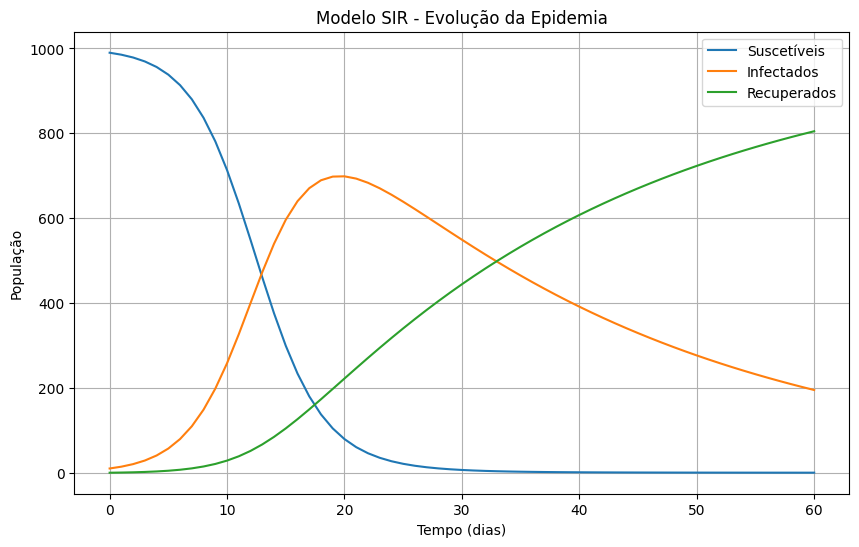

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
beta = 0.4
gamma = 0.035
N = 1000  # População total inicial
S0 = 990  # Suscetíveis iniciais
I0 = 10   # Infectados iniciais
R0 = 0    # Recuperados iniciais

# Período de simulação
t_total = 60  # Dias
dt = 1        # Passo de tempo (1 dia)

# Inicialização de listas para armazenar resultados
t = [0]
S = [S0]
I = [I0]
R = [R0]

# Função que calcula as taxas de variação das três classes S, I e R
def derivadas(S, I, R, beta, gamma, N):
    dSdt = -(beta / N) * S * I
    dIdt = (beta / N) * S * I - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Método Runge-Kutta de ordem 2 (Euler aperfeiçoado)
for _ in range(1, int(t_total / dt) + 1):
    dS1, dI1, dR1 = derivadas(S[-1], I[-1], R[-1], beta, gamma, N)
    S1 = S[-1] + dS1 * dt / 2
    I1 = I[-1] + dI1 * dt / 2
    R1 = R[-1] + dR1 * dt / 2

    dS2, dI2, dR2 = derivadas(S1, I1, R1, beta, gamma, N)
    S2 = S[-1] + dS2 * dt
    I2 = I[-1] + dI2 * dt
    R2 = R[-1] + dR2 * dt

    t.append(t[-1] + dt)
    S.append(S2)
    I.append(I2)
    R.append(R2)

# Plotagem das curvas S(t), I(t) e R(t)
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Suscetíveis')
plt.plot(t, I, label='Infectados')
plt.plot(t, R, label='Recuperados')
plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.legend()
plt.title('Modelo SIR - Evolução da Epidemia')
plt.grid(True)

# Encontrando o pico da epidemia
dia_pico = t[I.index(max(I))]
print(f'O pico da epidemia ocorre no dia {dia_pico:.2f}.')

# Encontrando o momento em que a epidemia está "controlada"
dia_controle = t[I.index(min(I, key=lambda x: abs(x - 0.1)))]
print(f'A epidemia está "controlada" no dia {dia_controle:.2f}.')

plt.show()